In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Logistic Regression on Attrition Problem

In [4]:
df1 = pd.read_csv('general_data.csv')

In [5]:
df1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [6]:

df1.dropna(inplace=True)
df1.shape

(4382, 24)

In [7]:
df1 = df1.drop(columns = ['EmployeeID', 'EmployeeCount', 'Over18', 'StandardHours', ])

In [8]:
def encode(cols):
    enc = LabelEncoder()
    for col in cols:
        df1[col] = enc.fit_transform(df1[col])

In [9]:
encode_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
encode(encode_cols)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   int64  
 2   BusinessTravel           4382 non-null   int64  
 3   Department               4382 non-null   int64  
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   int64  
 7   Gender                   4382 non-null   int64  
 8   JobLevel                 4382 non-null   int64  
 9   JobRole                  4382 non-null   int64  
 10  MaritalStatus            4382 non-null   int64  
 11  MonthlyIncome            4382 non-null   int64  
 12  NumCompaniesWorked       4382 non-null   float64
 13  PercentSalaryHike        4382 non-null   int64  
 14  StockOptionLevel        

In [11]:
y1 = df1['Attrition']
x1 = df1.drop(columns = ['Attrition'])

In [12]:
display(x1.head())
display(y1.head())

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [13]:

X1 = sm.add_constant(x1)
logistic_model1 = sm.Logit(y1,X1)

In [14]:
result1 = logistic_model1.fit()

Optimization terminated successfully.
         Current function value: 0.392916
         Iterations 7


In [15]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4382
Model:                          Logit   Df Residuals:                     4362
Method:                           MLE   Df Model:                           19
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.1093
Time:                        15:13:45   Log-Likelihood:                -1721.8
converged:                       True   LL-Null:                       -1933.1
Covariance Type:            nonrobust   LLR p-value:                 8.681e-78
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0270      0.414      0.065      0.948      -0.785       0.839
Age                        -0.0307      0.007     -4.478      0.000      -0.044      -0.017
BusinessTravel             -0.0137      0.066     -0.209      0.834      -0.143       0.115
Department                 -0.2229      0.082     -2.735      0.006      -0.383      -0.063
DistanceFromHome           -0.0012      0.005     -0.231      0.818      -0.012       0.009
Education                  -0.0664      0.043     -1.555      0.120      -0.150       0.017
EducationField             -0.0954      0.034     -2.849      0.004      -0.161      -0.030
Gender                      0.0855      0.090      0.952      0.341      -0.091       0.262
JobLevel                   -0.0285      0.040     -0.716      0.474      -0.107       0.050
JobRole                     0.0400      0.018      2.226      0.026       0.005       0.075
MaritalStatus               0.5835      0.063      9.212      0.000       0.459       0.708
MonthlyIncome           -1.815e-06   9.57e-07     -1.897      0.058   -3.69e-06    6.01e-08
NumCompaniesWorked          0.1174      0.018      6.390      0.000       0.081       0.153
PercentSalaryHike           0.0126      0.012      1.067      0.286      -0.011       0.036
StockOptionLevel           -0.0675      0.052     -1.302      0.193      -0.169       0.034
TotalWorkingYears          -0.0584      0.012     -4.873      0.000      -0.082      -0.035
TrainingTimesLastYear      -0.1443      0.035     -4.097      0.000      -0.213      -0.075
YearsAtCompany              0.0132      0.018      0.718      0.473      -0.023       0.049
YearsSinceLastPromotion     0.1328      0.020      6.479      0.000       0.093       0.173
YearsWithCurrManager       -0.1394      0.022     -6.288      0.000      -0.183      -0.096
===========================================================================================
"""

#Inference
The following factors highly affect attrition in employees:

1. Age of the employee
2. Marital status of the employee
3. Total number of companies the employee has worked for
4. Total number of years the employee has worked so far
5. Number of times training was conducted for this employee last year
6. Number of years since last promotion
7. Number of years under current manager
8. The following factors also affect attrition in employees:

The following factors also affect attrition in employees:
1. Department in company
2. Field of education

###----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#Logistic Regression on House Prices

In [28]:
df2  = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name = 'Data')
df2.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [29]:
df2 = df2.drop(columns = ['ID', 'ZIP Code'] )
df2.drop_duplicates(inplace=True)
df2.shape

(4987, 12)

In [30]:

y2 = df2['Personal Loan']
x2 = df2[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', \
        'Securities Account', 'CD Account', 'Online', 'CreditCard']]

In [31]:
X2 = sm.add_constant(x2)
logistic_model2 = sm.Logit(y2,X2)

In [32]:
result2 = logistic_model2.fit()

Optimization terminated successfully.
         Current function value: 0.128720
         Iterations 9


In [33]:

result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 4987
Model:                          Logit   Df Residuals:                     4975
Method:                           MLE   Df Model:                           11
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.5936
Time:                        15:24:38   Log-Likelihood:                -641.93
converged:                       True   LL-Null:                       -1579.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1727      1.645     -7.399      0.000     -15.397      -8.948
Age                   -0.0541      0.061     -0.882      0.378      -0.174       0.066
Experience             0.0642      0.061      1.054      0.292      -0.055       0.184
Income                 0.0545      0.003     20.822      0.000       0.049       0.060
Family                 0.6947      0.074      9.348      0.000       0.549       0.840
CCAvg                  0.1236      0.040      3.117      0.002       0.046       0.201
Education              1.7363      0.115     15.091      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.848      0.396      -0.001       0.002
Securities Account    -0.9371      0.286     -3.280      0.001      -1.497      -0.377
CD Account             3.8181      0.324     11.788      0.000       3.183       4.453
Online                -0.6724      0.157     -4.280      0.000      -0.980      -0.364
CreditCard            -1.1181      0.205     -5.454      0.000      -1.520      -0.716
======================================================================================
"""

#Inference
When a bank wants to offer a loan, the following factors are highly significant:

1. Annual income of the customer
2. Family size of the customer
3. Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
4. Does the customer have a certificate of deposit (CD) account with the bank?
5. Does the customer use internet banking facilities?
6. Does the customer use a credit card issued by UniversalBank?

The following factors are also significant to some extent:

1. Avg. spending on credit cards per month
2. Does the customer have a securities account with the bank
####----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#Linear Regression on Bank Personal Loan Modelling

In [35]:
df3 = pd.read_excel('Linear Regression.xlsx')
df3.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [36]:

df3.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [38]:
df3.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

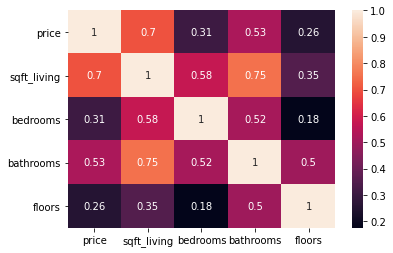

In [39]:
sns.heatmap(df3.corr(), annot = True)

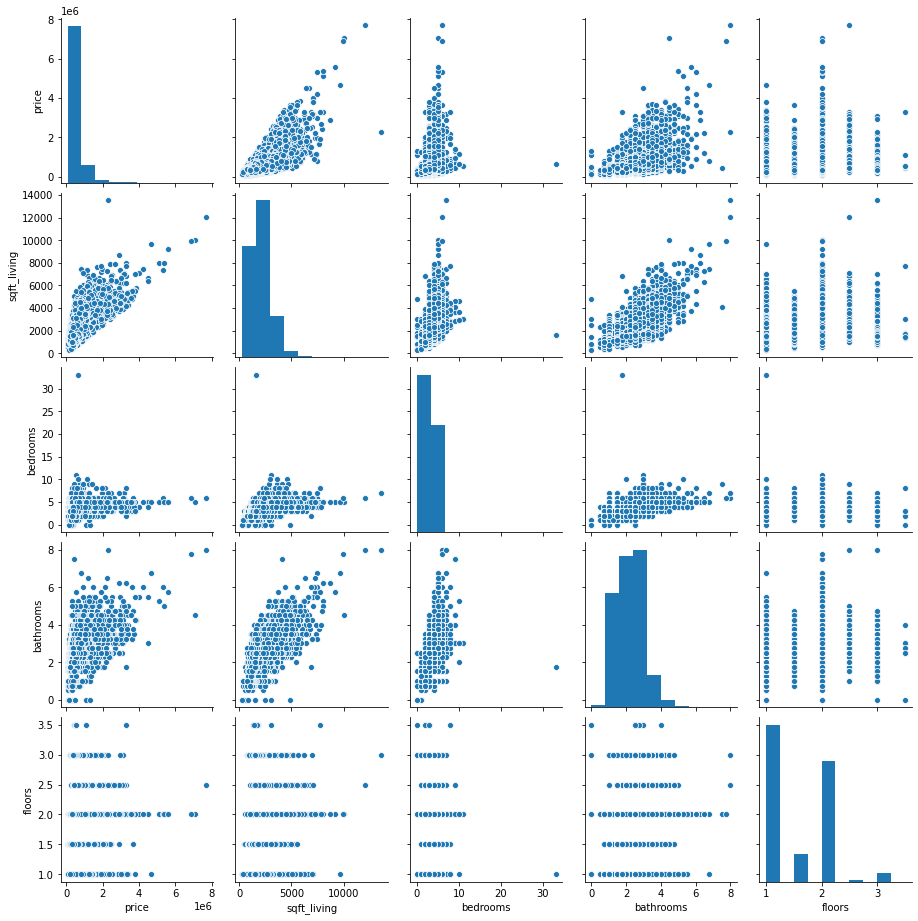

In [40]:
sns.pairplot(df3)

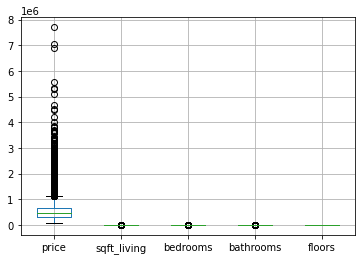

In [41]:
df3.boxplot()

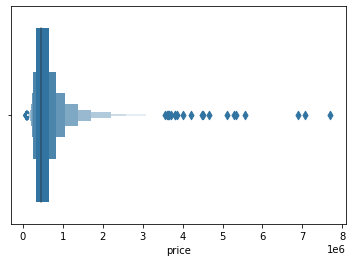

In [42]:
sns.boxenplot(df3.price)

#LINEAR REGRESSION MODEL BETWEEN PRICE AND SQFT_LIVING:-

In [43]:
price = df3.iloc[:, :1]
sqft_living = df3.iloc[:,1:2]

Text(0, 0.5, 'Area in squarefeet')

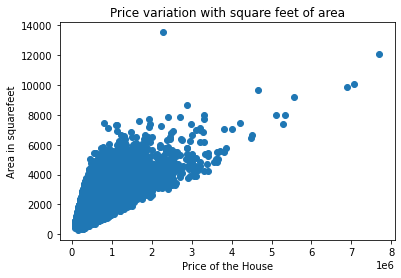

In [44]:
plt.scatter(price, sqft_living)
plt.title('Price variation with square feet of area')
plt.xlabel('Price of the House')
plt.ylabel('Area in squarefeet')

In [45]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(price, sqft_living, test_size = 0.3, random_state = 3)

In [46]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
model1.coef_

array([[0.00175397]])

In [48]:
model1.intercept_

array([1134.33195675])

Text(0, 0.5, 'Area in squarefeet')

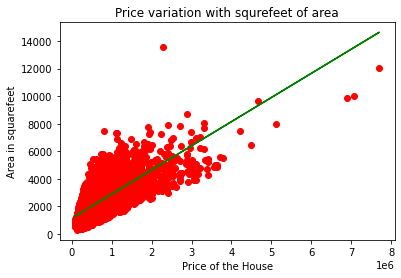

In [49]:
plt.scatter(X_train1, y_train1, color = 'red')
plt.plot(X_train1, model1.predict(X_train1), color = 'green')
plt.title('Price variation with squrefeet of area')
plt.xlabel('Price of the House')
plt.ylabel('Area in squarefeet')

In [50]:
y_pred1 = model1.predict(X_test1)

Text(0, 0.5, 'Area in squarefeet')

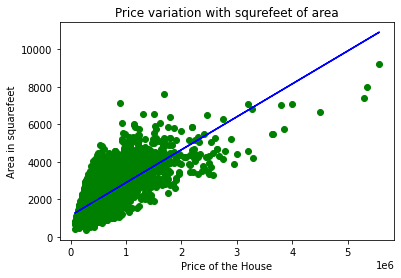

In [51]:
plt.scatter(X_test1,y_test1, color = 'green')
plt.plot(X_test1, model1.predict(X_test1), color = 'blue')
plt.title('Price variation with squrefeet of area')
plt.xlabel('Price of the House')
plt.ylabel('Area in squarefeet')

In [52]:
RMSE1 = np.sqrt(mean_squared_error(y_test1, y_pred1))
r_square1 = r2_score(y_test1, y_pred1)

print(f'The R-Square value is....{r_square1}')
print(f'The RMSE value is........{RMSE1}')

The R-Square value is....0.4948062123895899
The RMSE value is........651.7159424007161


In [53]:
unseen_pred1 = model1.predict(np.array([[7368]]))
print(f'The unseen for the given x is....{unseen_pred1}')

The unseen for the given x is....[[1147.25521953]]


#LINEAR REGRESSION MODEL BETWEEN PRICE AND BEDROOMS:-

In [54]:
bedroom = df3.iloc[:,2:3]

Text(0, 0.5, 'No of bedroom')

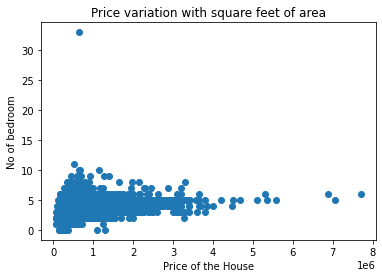

In [55]:
plt.scatter(price, bedroom)
plt.title('Price variation with square feet of area')
plt.xlabel('Price of the House')
plt.ylabel('No of bedroom')

In [56]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(price,bedroom,test_size = 0.3,random_state = 3)

In [57]:

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
model2.coef_

array([[7.83305263e-07]])

In [59]:
model2.intercept_

array([2.9512172])

Text(0, 0.5, 'Number of Bedrooms')

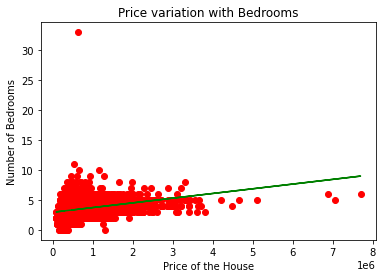

In [60]:
plt.scatter(X_train2, y_train2, color = 'red')
plt.plot(X_train2, model2.predict(X_train2), color = 'green')
plt.title('Price variation with Bedrooms')
plt.xlabel('Price of the House')
plt.ylabel('Number of Bedrooms')

In [61]:
y_pred2 = model2.predict(X_test2)

Text(0, 0.5, 'Number of bedrooms')

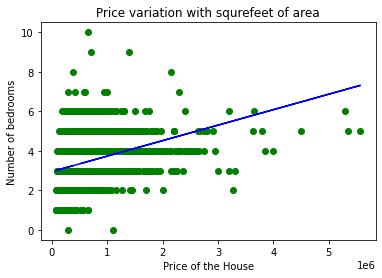

In [62]:
plt.scatter(X_test2,y_test2, color = 'green')
plt.plot(X_test2, model2.predict(X_test2), color = 'blue')
plt.title('Price variation with squrefeet of area')
plt.xlabel('Price of the House')
plt.ylabel("Number of bedrooms")

In [63]:
RMSE2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
r_square2 = r2_score(y_test2, y_pred2)

print(f'The R-Square value is....{r_square2}')
print(f'The RMSE value is........{RMSE2}')

The R-Square value is....0.09876923049599795
The RMSE value is........0.8577257263469096


#LINEAR REGRESSION MODEL BETWEEN PRICE AND FLOORS

In [64]:
floor = df3.iloc[:,4:5]

Text(0, 0.5, 'No of floor')

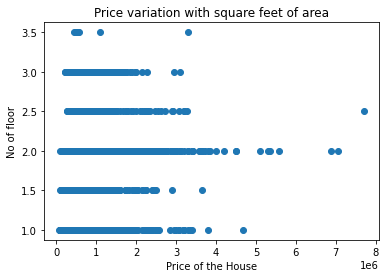

In [65]:
plt.scatter(price, floor)
plt.title('Price variation with square feet of area')
plt.xlabel('Price of the House')
plt.ylabel('No of floor')

In [66]:
X_train4,X_test4,y_train4,y_test4 = train_test_split(price,floor,test_size = 0.3,random_state = 3)

In [67]:
model4 = LinearRegression()
model4.fit(X_train4,y_train4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Number of floors')

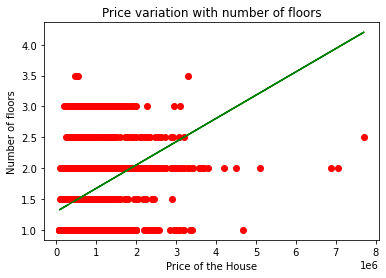

In [69]:
plt.scatter(X_train4, y_train4, color = 'red')
plt.plot(X_train4, model4.predict(X_train4), color = 'green')
plt.title('Price variation with number of floors')
plt.xlabel('Price of the House')
plt.ylabel('Number of floors')

In [70]:

y_pred4 = model4.predict(X_test4)

Text(0, 0.5, 'Number of floors')

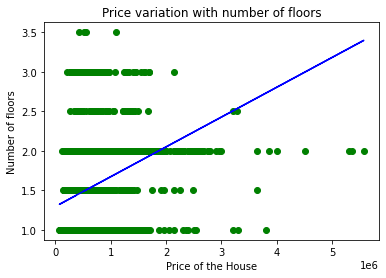

In [71]:
plt.scatter(X_test4,y_test4, color = 'green')
plt.plot(X_test4,model4.predict(X_test4), color = 'blue')
plt.title('Price variation with number of floors')
plt.xlabel('Price of the House')
plt.ylabel("Number of floors")

In [72]:
RMSE4 = np.sqrt(mean_squared_error(y_test4, y_pred4))
r_square4 = r2_score(y_test4, y_pred4)

print(f'The R-Square value is....{r_square4}')
print(f'The RMSE value is........{RMSE4}')

The R-Square value is....0.06539276476247435
The RMSE value is........0.5206765956498255


#MULTIPLE LINEAR REGRESSION.

In [73]:
x = df3.iloc[:,1:5]
y = df3.iloc[:,:1]

In [74]:
X_train5,X_test5,y_train5,y_test5 = train_test_split(x,y,test_size = 0.3,random_state = 3)

In [76]:
model_mul = LinearRegression(normalize=True)
model_mul

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [77]:
model_mul.fit(X_train5,y_train5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [78]:
y_pred5 = model_mul.predict(X_test5)

In [79]:
RMSE5 = np.sqrt(mean_squared_error(y_test5, y_pred5))
r_square5 = r2_score(y_test5, y_pred5)

print(f'The R-Square value is....{r_square5}')
print(f'The RMSE value is........{RMSE5}')

The R-Square value is....0.5121711417995446
The RMSE value is........255713.6754334812


In [80]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0,321950.00,450000.00,645000.0,7700000.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5


###----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------